# **Obtención y preparación de datos**

#OD06. Tarea 1: Modelo Epidemiológico Básico

Adaptado de Contagio Lineal, Leonardo Martinez Sandoval, 2019.


## <font color='orange'>**Objetivo**</font>

Construir un modelo epidemiológico básico usando álgebra lineal. Para ello, se modelará la epidemia como un **modelo de Markov**.

*Nota 1: En primer lugar debe quedar claro que ningún modelo es una representación perfecta de la realidad. Su validez depende de lo razonables que sean las estimaciones o suposiciones tomadas y de su grado de aproximación a la realidad*

Con este modelo básico, se podrán verificar varias de las acciones que hemos estado aprendiendo durante la crisis de la pandemia del covid19. 

Se estudiarán dos escenarios posibles:

1. La gente sale de sus casas (contagio alto).
2. La gente se queda en sus casas (contagio bajo).

Para modelar se usarán las librerías **NumPy** y **Matplotlib**.

*Nota 2: La librería Matplotlib se revisará en detalle en el módulo 3 del diplomado. En esta actividad la utilizaremos para graficar los resultados de nuestro modelo.*

El objetivo es construir un modelo que nos permita visualizar la evolución de la enfermedad en el tiempo (ver figura).

<img src='https://drive.google.com/uc?export=view&id=1JEQuOy062yyASrdO3xmNtCO25nITmvWW' width="500" align="center" style="margin-right: 20px">

## <font color='blue'>**¿Qué es un modelo de Markov?**</font>

Un modelo de Markov aplicado al campo sanitario puede definirse como **un modelo estocástico de una enfermedad en el que se asume que el paciente se encuentra siempre en uno de un número finito de estados de salud**, denominados estados de Markov, los cuales deben ser **exhaustivos**, es decir, todos los posibles; y **mutuamente excluyentes**, un individuo no puede estar en dos estados al mismo tiempo.

Los estados pueden ser de dos tipos: 

1. **Absorbentes**: aquellos que no pueden abandonarse, siendo el más habitual y obvio el estado de *muerte*.

2. **No absorbentes**: cualquier estado desde el que se puede pasar a otro distinto.

Los acontecimientos se modelizan como pasos o transiciones de unos estados a otros que se producen en períodos uniformes de tiempo, que se denominan ciclos de Markov, y con una probabilidad de transición que depende del estado en el que se encuentre el individuo en cada momento.

Los modelos de Markov pueden representarse gráficamente como una variante de los árboles de decisión empleados en los modelos determinísticos, como diagramas en cascada, o bien como un diagrama de influencias.

Posibles representaciones gráficas de los modelos de Markov. A: como árboles de decisión. B: como diagramas en cascada. C: como diagramas de influencia.

<img src='https://drive.google.com/uc?export=view&id=1vRLKkWgZkLskeYVtm5zuVEbeDPmXQh44' width="400" align="center" style="margin-right: 20px">

*Referencia: C. Rubio Terrés, "Introduction to the use of Markov models in pharmacoeconomic analysis," Farmacia Hospitalaria, vol. 24, n°4, 241-247, 2000.*

### ¿Cuándo debe utilizarse un modelo de Markov y con qué condiciones?

Puede estar justificado utilizar un modelo de Markov cuando se trata de eventos repetitivos, irreversibles y de larga duración. En caso de realizarse, las condiciones generales de los modelos de Markov son las siguientes:

* Sólo se permiten unas determinadas transiciones entre estados previamente establecidas.

* La duración de los ciclos de Markov, que es arbitraria, debe ser constante a lo largo de la simulación.

* Cada paciente sólo puede hacer una transición en cada ciclo.

* Todos los pacientes están sometidos a las mismas probabilidades de transición.

### Ventajas e inconvenientes de los modelos de Markov

Los modelos de Markov ayudan a modelizar eventos sanitarios complejos que pueden simplificarse en exceso con los modelos determinísticos. 

Son especialmente útiles para modelizar enfermedades crónicas. La modelización de Markov intenta simular de una manera más *«realista»* lo que ocurre en el proceso de la enfermedad. Sin embargo, en algunas ocasiones este tipo de modelo puede ser inviable debido a la insuficiencia de los datos disponibles. Por ejemplo, en modelos muy complejos puede ser difícil establecer la totalidad de las probabilidades de transición entre los estados de salud.

Por otra parte, en los modelos se hace una suposición bastante fuerte, la denominada suposición markoviana. De acuerdo con ésta **el modelo carece de «memoria»** y se asume que conociendo únicamente el estado de salud presente de un paciente es posible simular la evolución futura del mismo; es decir, se asume que todos los pacientes que se encuentran en un estado de salud, en un momento concreto, tienen el mismo pronóstico, independientemente de su estado previo. Por tanto, un paciente que pasa del estado *«sano»* al de *«enfermo»* tendría el mismo pronóstico que otro paciente *«enfermo»* que transcurrido el ciclo siguiese en el mismo estado de *«enfermo»*. Esta suposición del modelo no se ajusta estrictamente a la realidad de numerosas enfermedades, por lo que supone un inconveniente de los modelos de Markov.

## <font color='blue'>**Modelo epidemiológico básico para Covid19**</font>

### Suposiciones y modelo de Markov

1. La población inicial es de 100.000 habitantes sanos, en el día 0.

2. Una persona puede estar en alguno de los siguientes cinco estados:
    * Sano
    * Síntomas leves
    * Síntomas graves
    * Recuperado
    * Fallecido

3. Asociado a los estados anteriores podemos obtener las siguientes probabilidades de transición:
    * $s_l$, la probabilidad de pasar de estar sano a tener síntomas leves,
    * $l_g$, la probabilidad de pasar de tener síntomas leves a graves,
    * $l_r$, la probabilidad de pasar de tener síntomas leves a recuperarse,
    * $g_r$, la probabilidad de pasar de tener síntomas graves a recuperarse y
    * $g_f$, la probabilidad de pasar de tener síntomas graves, a fallecer.

Para cada día $n$, consideremos el vector:

$$\mathbf{X}(n) = \begin{pmatrix}s(n), l(n), g(n), r(n), f(n)\end{pmatrix}$$

que corresponde a los individuos sanos, los de síntomas leves, de síntomas graves, recuperados y fallecidos al día $n$.

Por ejemplo al día $0$ todos los individuos están sanos, así que $X(0)=(100000,0,0,0,0)$.

Para la evolución entre los distintos estados de Markov, se realizan las siguientes suposiciones:

1. Paso de un estado a otro:
    * Los únicos fallecidos del periodo de tiempo que tendremos son por Covid19. Sólo se puede fallecer de ello tras tener síntomas graves. Si alguien tiene síntomas graves, entonces tiene cierta probabilidad $g_f$ de fallecer al día siguiente, $g_r$ de recuperarse y por lo tanto $(1-g_r-g_f)$ de quedarse como enfermo grave.
        
    * Covid19 se contagia de persona a persona, y de un día a otro una persona tiene probabilidad $s_l$ de pasar de estar sana a tener síntomas leves. No se puede pasar directamente a tener síntomas graves, recuperarse o morir. De modo que se queda sana de un día a otro con probabilidad $(1-s_l)$.
        
    * Si una persona tiene síntomas leves, tiene probabilidad $l_g$ de pasar a tener síntomas graves y $l_r$ de pasar a recuperarse. Por lo tanto, tiene probabilidad $(1-l_g-l_r)$ de quedarse con síntomas leves.
        
    * Una persona que se recupera desarrolla inmunidad a Covid19, así que se queda en ese estado.
        
    * Una persona que fallece, se queda en ese estado.
    
En otras palabras, tenemos el siguiente diagrama de influencia para las transiciones de un estado a otro, en donde los números en las flechas muestran la probabilidad de pasar de un estado a otro:

<img src='https://drive.google.com/uc?export=view&id=14xNoCzg-RxK7-34axR-MIkhaJ9c86BkU' width="700" align="center" style="margin-right: 20px">

Con estos números y suposiciones, podemos entender, en valor esperado, cómo será el vector de población

$$\mathbf{X}(n+1) = \begin{pmatrix}s(n+1), l(n+1), g(n+1), r(n+1), f(n+1)\end{pmatrix}$$

si sabemos cómo es el vector

$$\mathbf{X}(n) = \begin{pmatrix}s(n), l(n), g(n), r(n), f(n)\end{pmatrix}$$

Por ejemplo, podemos esperar que la cantidad de recuperados al día $n+1$ sea:

$$r(n+1) = l_r·l(n) + g_r·g(n) + 1·r(n)$$

pues de los de síntomas leves del día $n$ habrá una proporción $l_r$ de ellos que se recuperen, de los graves del día $n$ habrá una proporción $g_r$ de ellos que se recuperen, y todos los recuperados del día $n$ se quedan recuperados. De esta forma, obtenemos el siguiente sistema de ecuaciones de lo que podemos esperar:

$s(n+1) = (1 - s_l)·s(n)$

$l(n+1) = s_l·s(n)+(1-l_r-l_g)·l(n)$

$g(n+1) = l_g·l(n)+(1-g_r-g_f)·g(n)$

$r(n+1) = l_r·l(n)+g_r·g(n)+1·r(n)$

$f(n+1) = g_f·g(n)+1·f(n)$

Este sistema de ecuaciones se puede escribir de una forma mucho más compacta. Si definimos la matriz:

$$\mathbf{A}=\begin{pmatrix} 1-s_l & 0 & 0 & 0 & 0 \\s_l & 1-l_r-l_g & 0 & 0 & 0 \\0 & l_g & 1-g_r-g_f & 0 & 0 \\ 0 & l_r & g_r & 1 & 0\\ 0 & 0 & g_f & 0 & 1 \end{pmatrix}$$

las ecuaciones anteriores se pueden abreviar simplemente a:

$$X(n+1)=AX(n)$$

De esta forma, si queremos entender qué esperar del día $n$, basta hacer la multiplicación matricial:

$$X(n)=A^n X(0)$$.

## <font color='green'>Actividad 1</font>
### Escenario 1: Tasa de contagio alta

Se tienen los siguientes valores para los parámetros del modelo: $s_l=0.30$, $l_g=0.10$, $l_r=0.20$, $g_r=0.10$ y $g_f=0.10$.

1. Implmente el modelo epidemiológico básico mediante una función en Python.

2. Grafique los resultados de su modelo para mostrar como evoluciona la epidemia de Covid19 para un periodo de 60 días.

3. Entregue los resultados para la evolución de la enfermedad en la primera semana de análisis.

4. Para el último día de la ventana de estudio, calcule la cantidad de individuos recuperados y fallecidos.

In [3]:
# Parte 1

import numpy as np
import matplotlib.pyplot as plt

# Población inicial (supuesto 1)
x_0 = [100000, 0, 0, 0, 0]

# Definimos las probabilidades de transición (supuesto 3 y datos del enunciado)
S_L = 0.30
L_G = 0.10
L_R = 0.20
G_R = 0.10
G_F = 0.10

# Definimos la matriz A
A = np.array([[(1-S_L), 0, 0, 0, 0],
              [S_L, (1-L_R-L_G), 0, 0, 0],
              [0, L_G, (1-G_R-G_F), 0, 0],
              [0, L_R, G_R, 1, 0],
              [0, 0, G_F, 0, 1]])
print(f" Matriz A \n{A}\n\n")


# Encontramos la evolución de la epidemia los primeros 60 días
dias = 60
evolucion = [x_0]
#dia_1 = evolucion.append(A.dot(x_0))  #A*evolucion
#print(f" Dia 1 \n{evolucion}\n\n")

for j in range(dias):
  evolucion.append(A.dot(evolucion[-1]))
  #evolucion = (A**dias)*evolucion
print(f" Dia {j} \n{evolucion}\n\n")
  

 Matriz A 
[[0.7 0.  0.  0.  0. ]
 [0.3 0.7 0.  0.  0. ]
 [0.  0.1 0.8 0.  0. ]
 [0.  0.2 0.1 1.  0. ]
 [0.  0.  0.1 0.  1. ]]


 Dia 59 
[[100000, 0, 0, 0, 0], array([70000., 30000.,     0.,     0.,     0.]), array([49000., 42000.,  3000.,  6000.,     0.]), array([34300., 44100.,  6600., 14700.,   300.]), array([24010., 41160.,  9690., 24180.,   960.]), array([16807., 36015., 11868., 33381.,  1929.]), array([11764.9, 30252.6, 13095.9, 41770.8,  3115.8]), array([ 8235.43, 24706.29, 13501.98, 49130.91,  4425.39]), array([ 5764.801, 19765.032, 13272.213, 55422.366,  5775.588]), array([ 4035.3607, 15564.9627, 12594.2736, 60702.5937,  7102.8093]), array([ 2824.75249, 12106.0821 , 11631.91515, 65075.0136 ,  8362.23666]), array([ 1977.326743,  9321.683217, 10516.14033 , 68659.421535,
        9525.428175]), array([ 1384.1287201,  7118.3762748,  9345.0805857, 71575.3722114,
       10577.042208 ]), array([  968.89010407,  5398.10200839,  8187.90209604, 73933.55552493,
       11511.55026657]), a

En Numpy se pueden multiplicar matrices con la función:

```
numpy.matmul(A,X)
```

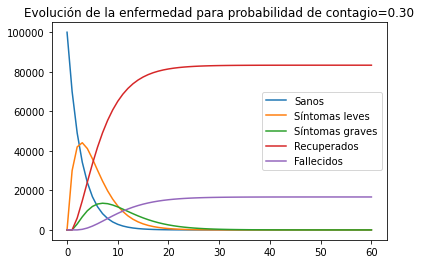

In [4]:
#Parte 2

#Gráfica para mostrar la evolución de la pandemia en el periodo de tiempo analizado
plt.plot([j[0] for j in evolucion], label="Sanos")
plt.plot([j[1] for j in evolucion], label="Síntomas leves")
plt.plot([j[2] for j in evolucion], label="Síntomas graves")
plt.plot([j[3] for j in evolucion], label="Recuperados")
plt.plot([j[4] for j in evolucion], label="Fallecidos")
plt.title("Evolución de la enfermedad para probabilidad de contagio=0.30")
plt.legend()
plt.show()

In [5]:
#Parte 3

# Mostramos la primera semana de análisis
for j in range(7):
    print(f" Dia {j} \n{evolucion[j]}\n\n")


# Mostramos la ultima semana de análisis
for j in range(54,61):
    print(f" Dia {j} \n{evolucion[j]}\n\n")


 Dia 0 
[100000, 0, 0, 0, 0]


 Dia 1 
[70000. 30000.     0.     0.     0.]


 Dia 2 
[49000. 42000.  3000.  6000.     0.]


 Dia 3 
[34300. 44100.  6600. 14700.   300.]


 Dia 4 
[24010. 41160.  9690. 24180.   960.]


 Dia 5 
[16807. 36015. 11868. 33381.  1929.]


 Dia 6 
[11764.9 30252.6 13095.9 41770.8  3115.8]


 Dia 54 
[4.31811457e-04 9.99335086e-03 1.74251318e+00 8.33324534e+04
 1.66657937e+04]


 Dia 55 
[3.02268020e-04 7.12488904e-03 1.39500988e+00 8.33326296e+04
 1.66659679e+04]


 Dia 56 
[2.11587614e-04 5.07810273e-03 1.11672039e+00 8.33327706e+04
 1.66661074e+04]


 Dia 57 
[1.48111330e-04 3.61814820e-03 8.93884124e-01 8.33328833e+04
 1.66662191e+04]


 Dia 58 
[1.03677931e-04 2.57713714e-03 7.15469114e-01 8.33329734e+04
 1.66663085e+04]


 Dia 59 
[7.25745515e-05 1.83509937e-03 5.72633005e-01 8.33330454e+04
 1.66663800e+04]


 Dia 60 
[5.08021861e-05 1.30634193e-03 4.58289914e-01 8.33331031e+04
 1.66664373e+04]




In [6]:
#Parte 4

#Mostramos recuperados y fallecidos al último día
print(f"Recuperados Ultimo dia {evolucion[-1][3]}")
print(f"Fallecidos Ultimo dia {evolucion[-1][4]}")


Recuperados Ultimo dia 83333.10305742307
Fallecidos Ultimo dia 16666.4372955191


<font color='green'>Fin actividad 1</font>

## <font color='green'>Actividad 2</font>

### Escenario 2: Menor tasa de contagio

Considere que la tasa de contagio $s_l$ disminuye y tiene un valor de 0.05. Todas las otras probabilidades de transición se mantienen inalteradas con respecto al escenario 1. Considere una ventana de análisis de 60 días.

1. Ejecute el modelo epidemiológico con las nuevas condiciones iniciales.

2. Grafique la evolución del modelo para el escenario 2.

3. Compare los escenarios 1 y 2 en términos de la cantidad de personas fallecidas a los 30 y 60 días.

4. Considere que la capacidad total del sistema de salud es de 6.000 camas. Grafique los enfermos leves y graves para ambos escenarios en conjunto con la capacidad del sistema de salud. Comente los resultados.

5. Considerando que sólo los enfermos graves utilizan camas del sistema de salud, indique, para ambos escenarios, en qué día el sistema colapsa (existen más casos graves que camas disponibles).

6. Grafique la curva de fallecidos para ambos escenarios para todo el periodo de tiempo analizado.

In [7]:
# Parte 1

import numpy as np
import matplotlib.pyplot as plt

# Población inicial (supuesto 1)
x_0 = [100000, 0, 0, 0, 0]

# Definimos las probabilidades de transición (supuesto 3 y datos del enunciado)
S_L = 0.05
L_G = 0.10
L_R = 0.20
G_R = 0.10
G_F = 0.10

# Definimos la matriz A
A = np.array([[(1-S_L), 0, 0, 0, 0],
              [S_L, (1-L_R-L_G), 0, 0, 0],
              [0, L_G, (1-G_R-G_F), 0, 0],
              [0, L_R, G_R, 1, 0],
              [0, 0, G_F, 0, 1]])
print(f" Matriz A \n{A}\n\n")


# Encontramos la evolución de la epidemia los primeros 60 días
dias = 60
evolucion2 = [x_0]
#dia_1 = evolucion.append(A.dot(x_0))  #A*evolucion
#print(f" Dia 1 \n{evolucion2}\n\n")

for j in range(dias):
  evolucion2.append(A.dot(evolucion[-1]))
  #evolucion = (A**dias)*evolucion
print(f" Dia {j} \n{evolucion2}\n\n")
  

 Matriz A 
[[0.95 0.   0.   0.   0.  ]
 [0.05 0.7  0.   0.   0.  ]
 [0.   0.1  0.8  0.   0.  ]
 [0.   0.2  0.1  1.   0.  ]
 [0.   0.   0.1  0.   1.  ]]


 Dia 59 
[[100000, 0, 0, 0, 0], array([4.82620768e-05, 9.16979459e-04, 3.66762565e-01, 8.33331491e+04,
       1.66664831e+04]), array([4.82620768e-05, 9.16979459e-04, 3.66762565e-01, 8.33331491e+04,
       1.66664831e+04]), array([4.82620768e-05, 9.16979459e-04, 3.66762565e-01, 8.33331491e+04,
       1.66664831e+04]), array([4.82620768e-05, 9.16979459e-04, 3.66762565e-01, 8.33331491e+04,
       1.66664831e+04]), array([4.82620768e-05, 9.16979459e-04, 3.66762565e-01, 8.33331491e+04,
       1.66664831e+04]), array([4.82620768e-05, 9.16979459e-04, 3.66762565e-01, 8.33331491e+04,
       1.66664831e+04]), array([4.82620768e-05, 9.16979459e-04, 3.66762565e-01, 8.33331491e+04,
       1.66664831e+04]), array([4.82620768e-05, 9.16979459e-04, 3.66762565e-01, 8.33331491e+04,
       1.66664831e+04]), array([4.82620768e-05, 9.16979459e-04, 3.66762

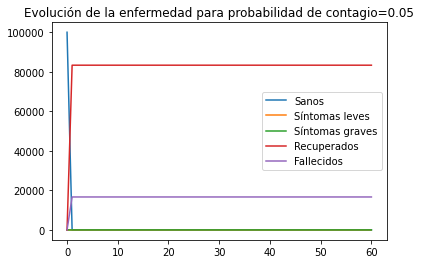

In [8]:
#Parte 2
#Gráfica para mostrar la evolución de la pandemia en el periodo de tiempo analizado
plt.plot([j[0] for j in evolucion2], label="Sanos")
plt.plot([j[1] for j in evolucion2], label="Síntomas leves")
plt.plot([j[2] for j in evolucion2], label="Síntomas graves")
plt.plot([j[3] for j in evolucion2], label="Recuperados")
plt.plot([j[4] for j in evolucion2], label="Fallecidos")
plt.title("Evolución de la enfermedad para probabilidad de contagio=0.05")
plt.legend()
plt.show()


In [9]:
#Parte 3

print(f"Al día 30, para contagio bajo el número de fallecidos es {evolucion2[30][4]}")
print(f"Al día 30, para contagio alto el número de fallecidos es {evolucion[30][4]}")
print(f"Al día 60, para contagio bajo el número de fallecidos es {evolucion2[60][4]}")
print(f"Al día 60, para contagio alto el número de fallecidos es {evolucion[60][4]}")

Al día 30, para contagio bajo el número de fallecidos es 16666.483124510476
Al día 30, para contagio alto el número de fallecidos es 16493.640623413397
Al día 60, para contagio bajo el número de fallecidos es 16666.483124510476
Al día 60, para contagio alto el número de fallecidos es 16666.4372955191


[]

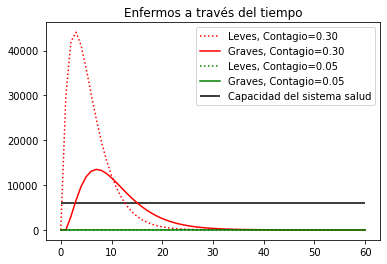

In [10]:
#Parte 4

camas = 6000
plt.plot([j[1] for j in evolucion], color="red", linestyle=":", label="Leves, Contagio=0.30")
plt.plot([j[2] for j in evolucion], color="red", label="Graves, Contagio=0.30")
plt.plot([j[1] for j in evolucion2], color="green", linestyle=":", label="Leves, Contagio=0.05")
plt.plot([j[2] for j in evolucion2], color="green", label="Graves, Contagio=0.05")
plt.hlines(camas, 0, dias, color="black", label="Capacidad del sistema salud")
plt.title("Enfermos a través del tiempo")
plt.legend()
plt.plot()

Quiebre de camas Contagio=0.30, dia : 3
Quiebre de camas Contagio=0.05, dia : 60


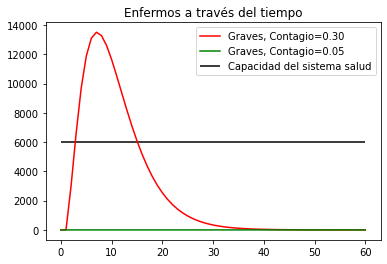

In [18]:
#Parte 5
#Considerando que sólo los enfermos graves utilizan camas del sistema de salud, 
#indique, para ambos escenarios, en qué día el sistema colapsa 
#(existen más casos graves que camas disponibles).

graves1 = [j[2] for j in evolucion]
graves2 = [j[2] for j in evolucion2]

plt.plot(graves1, color="red", label="Graves, Contagio=0.30")
plt.plot(graves2, color="green", label="Graves, Contagio=0.05")
plt.hlines(camas, 0, dias, color="black", label="Capacidad del sistema salud")
plt.title("Enfermos a través del tiempo")
plt.legend()
plt.plot()

dia_quiebre_camas1 = 0
for x in range(0,len(graves1)):
  if graves1[x] > camas:
     break

if x < len(graves1):
  dia_quiebre_camas1 = x


dia_quiebre_camas2 = 0
for x in range(0,len(graves2)):
  if graves2[x] > camas:
     break

if x < len(graves2):
  dia_quiebre_camas2 = x

print(f"Quiebre de camas Contagio=0.30, dia : {dia_quiebre_camas1}")
print(f"Quiebre de camas Contagio=0.05, dia : {dia_quiebre_camas2}")





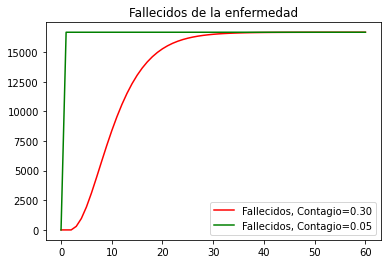

In [21]:
#Parte 6
#Grafique la curva de fallecidos para ambos escenarios para todo el periodo de tiempo analizado.
Fallecidos1 = [j[4] for j in evolucion]
Fallecidos2 = [j[4] for j in evolucion2]
plt.plot(Fallecidos1, color="red", label="Fallecidos, Contagio=0.30")
plt.plot(Fallecidos2, color="green", label="Fallecidos, Contagio=0.05")
plt.title("Fallecidos de la enfermedad")
plt.legend()
plt.show()




<font color='green'>Fin actividad 2</font>